In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel("US Dept Education data/Output/FourYearUniversitiesChris.xlsx")

In [3]:
data.head(2)

,UNITID,OPEID6,13-14 Predicted Final Data LN,13-14 Final_Predicted 10 year earnings,CONTROL,CONTROL.1,TUITIONFEE_IN,TUITIONFEE_OUT,ICLEVEL,PREDDEG,...,SD_EARN_WNE_P8,SD_EARN_WNE_P10,COUNT_NWNE_P6,COUNT_NWNE_P8,COUNT_NWNE_P10,COUNT_WNE_P6,COUNT_WNE_P8,COUNT_WNE_P10,UGDS_MEN,UGDS_WOMEN
0,100654,1002,10.538013,37722.522920,1,Public,9096.0,16596.0,1,3,...,20100.0,25400.0,94.0,142.0,212.0,1304.0,1485.0,1784.0,0.4831,0.5169
1,100663,1052,10.794632,48758.384286,1,Public,7510.0,17062.0,1,3,...,36500.0,39200.0,241.0,309.0,464.0,2727.0,3048.0,3643.0,0.4169,0.5831


In [4]:
data.columns

Index(['UNITID', 'OPEID6', '13-14 Predicted Final Data LN',
       '13-14 Final_Predicted 10 year earnings', 'CONTROL', 'CONTROL.1',
       'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'ICLEVEL', 'PREDDEG', 'ADM_RATE_ALL',
       'SAT_AVG_ALL', 'PCIP01', 'PCIP03', 'PCIP04', 'PCIP05', 'PCIP09',
       'PCIP10', 'PCIP11', 'PCIP12', 'PCIP13', 'PCIP14', 'PCIP15', 'PCIP16',
       'PCIP19', 'PCIP22', 'PCIP23', 'PCIP24', 'PCIP25', 'PCIP26', 'PCIP27',
       'PCIP29', 'PCIP30', 'PCIP31', 'PCIP38', 'PCIP39', 'PCIP40', 'PCIP41',
       'PCIP42', 'PCIP43', 'PCIP44', 'PCIP45', 'PCIP46', 'PCIP47', 'PCIP48',
       'PCIP49', 'PCIP50', 'PCIP51', 'PCIP52', 'PCIP54', 'TUITFTE',
       'AVGFACSAL', 'PFTFAC', 'PCTPELL', 'COSTT4_A', 'C150_4', 'RET_FT4',
       'CDR3', 'GRAD_DEBT_MDN', 'AGE_ENTRY', 'FAMINC', 'MN_EARN_WNE_P6',
       'MN_EARN_WNE_P8', 'MN_EARN_WNE_P10', 'MD_EARN_WNE_P6', 'MD_EARN_WNE_P8',
       'MD_EARN_WNE_P10', 'SD_EARN_WNE_P6', 'SD_EARN_WNE_P8',
       'SD_EARN_WNE_P10', 'COUNT_NWNE_P6', 'COUNT_

#### Drop rows with blank entries

In [5]:
data.shape

(1841, 78)

In [6]:
data = data.dropna(how='any')

In [7]:
data.shape

(1026, 78)

In [8]:
from sklearn.linear_model import LinearRegression, Lasso
model = LinearRegression()

### 1st Regression With (y) = 10yr Mean earnings

In [9]:
X = data[['CONTROL',
        'ICLEVEL', 'PREDDEG', 'ADM_RATE_ALL',
       'SAT_AVG_ALL', 'PCIP01', 'PCIP03', 'PCIP04', 'PCIP05', 'PCIP09',
       'PCIP10', 'PCIP11', 'PCIP12', 'PCIP13', 'PCIP14', 'PCIP15', 'PCIP16',
       'PCIP19', 'PCIP22', 'PCIP23', 'PCIP24', 'PCIP25', 'PCIP26', 'PCIP27',
       'PCIP29', 'PCIP30', 'PCIP31', 'PCIP38', 'PCIP39', 'PCIP40', 'PCIP41',
       'PCIP42', 'PCIP43', 'PCIP44', 'PCIP45', 'PCIP46', 'PCIP47', 'PCIP48',
       'PCIP49', 'PCIP50', 'PCIP51', 'PCIP52', 'PCIP54', 'TUITFTE',
       'AVGFACSAL', 'PFTFAC', 'PCTPELL', 'COSTT4_A', 'C150_4', 'RET_FT4',
       'CDR3', 'GRAD_DEBT_MDN', 'AGE_ENTRY', 'FAMINC', 'UGDS_MEN',
       'UGDS_WOMEN']]

y = data['MN_EARN_WNE_P10']


In [10]:
print(X.shape, y.shape)

(1026, 56) (1026,)


In [11]:
X.dtypes

CONTROL            int64
ICLEVEL            int64
PREDDEG            int64
ADM_RATE_ALL     float64
SAT_AVG_ALL      float64
PCIP01           float64
PCIP03           float64
PCIP04           float64
PCIP05           float64
PCIP09           float64
PCIP10           float64
PCIP11           float64
PCIP12           float64
PCIP13           float64
PCIP14           float64
PCIP15           float64
PCIP16           float64
PCIP19           float64
PCIP22           float64
PCIP23           float64
PCIP24           float64
PCIP25           float64
PCIP26           float64
PCIP27           float64
PCIP29           float64
PCIP30           float64
PCIP31           float64
PCIP38           float64
PCIP39           float64
PCIP40           float64
PCIP41           float64
PCIP42           float64
PCIP43           float64
PCIP44           float64
PCIP45           float64
PCIP46           float64
PCIP47           float64
PCIP48           float64
PCIP49           float64
PCIP50           float64


In [12]:
y.dtypes

dtype('float64')

### Use lasso to help reduce initial number of independant variables

In [13]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
print(model.coef_)
print(model.intercept_)

[-1.45119087e+03 -4.77066823e-02 -1.91938077e-02 -5.36010952e+03
  2.07481359e+01  8.90989741e+05  8.43515210e+05  8.86203871e+05
  8.33702054e+05  8.63901879e+05  8.93582395e+05  9.33147061e+05
  8.48020868e+05  8.81124740e+05  9.04439362e+05  8.83332896e+05
  8.51616905e+05  8.92086063e+05  8.84495065e+05  8.58462498e+05
  8.88725620e+05  7.57854014e+05  8.91168841e+05  8.85309657e+05
  8.86156101e+05  9.04388092e+05  8.82531140e+05  8.80872464e+05
  8.81875511e+05  9.07366455e+05  9.05106524e+05  8.82545374e+05
  8.91730640e+05  8.86320230e+05  9.03013125e+05  9.93191580e+05
  9.08044832e+05  8.30259695e+05  8.97571036e+05  8.74061555e+05
  9.01451943e+05  9.00601695e+05  9.23205615e+05  3.76471628e-01
  2.24105507e+00 -1.27927653e+03  2.27340144e+03  1.69153798e-01
  1.50853221e+03  1.59819879e+02 -2.78311556e+04 -3.84435450e-01
 -1.61036865e+01  4.41800799e-02  3.67703440e+03 -3.67703440e+03]
-876195.708103281


In [15]:
lasso = Lasso(alpha=1).fit(X,y)
lasso

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [16]:
lasso.coef_

array([-1.41273209e+03,  0.00000000e+00,  0.00000000e+00, -5.41154987e+03,
        2.08863992e+01,  1.30288792e+03, -4.17342778e+04, -0.00000000e+00,
       -3.82956613e+04, -2.32808429e+04,  0.00000000e+00,  4.24607418e+04,
       -0.00000000e+00, -6.99785343e+03,  1.62458382e+04, -1.15468956e+03,
       -3.20037120e+04,  1.06760746e+03, -2.22243888e+03, -2.57105659e+04,
        1.37578081e+02, -0.00000000e+00,  2.51033989e+03,  0.00000000e+00,
        0.00000000e+00,  1.46973967e+04, -4.42220086e+03, -5.23488825e+03,
       -6.55993795e+03,  1.29008502e+04,  0.00000000e+00, -4.81931149e+03,
        2.89931339e+03, -3.07855827e+02,  1.34764025e+04,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -1.43622095e+04,
        1.31351653e+04,  1.21502737e+04,  2.44221446e+04,  3.74376627e-01,
        2.24830621e+00, -1.16084541e+03,  1.85907769e+03,  1.67894689e-01,
        1.25787797e+03,  1.46940002e+02, -2.55238295e+04, -3.85532206e-01,
       -9.18552819e+00,  

In [17]:
lasso_results = pd.DataFrame()
lasso_results['feature']=X.columns
lasso_results['coef']=lasso.coef_
lasso_results

,feature,coef
0,CONTROL,-1412.732092
1,ICLEVEL,0.000000
2,PREDDEG,0.000000
3,ADM_RATE_ALL,-5411.549874
4,SAT_AVG_ALL,20.886399
5,PCIP01,1302.887917
6,PCIP03,-41734.277797
7,PCIP04,-0.000000
8,PCIP05,-38295.661271
9,PCIP09,-23280.842882


#### Drop independant variables with lasso = 0

In [18]:
X = data[['CONTROL', 'ADM_RATE_ALL',
       'SAT_AVG_ALL', 'PCIP01', 'PCIP03', 'PCIP05', 'PCIP09', 'PCIP11', 'PCIP13', 'PCIP14', 'PCIP15', 'PCIP16',
       'PCIP19', 'PCIP22', 'PCIP23', 'PCIP24', 'PCIP26', 'PCIP30', 'PCIP31', 'PCIP38', 'PCIP39', 'PCIP40',
       'PCIP42', 'PCIP43', 'PCIP44', 'PCIP45', 'PCIP50', 'PCIP51', 'PCIP52', 'PCIP54', 'TUITFTE',
       'AVGFACSAL', 'PFTFAC', 'PCTPELL', 'COSTT4_A', 'C150_4', 'RET_FT4',
       'CDR3', 'GRAD_DEBT_MDN', 'AGE_ENTRY', 'FAMINC', 'UGDS_MEN']]

In [19]:
X.head(2)

,CONTROL,ADM_RATE_ALL,SAT_AVG_ALL,PCIP01,PCIP03,PCIP05,PCIP09,PCIP11,PCIP13,PCIP14,...,PFTFAC,PCTPELL,COSTT4_A,C150_4,RET_FT4,CDR3,GRAD_DEBT_MDN,AGE_ENTRY,FAMINC,UGDS_MEN
0,1,0.5256,827.0,0.0424,0.0191,0.0000,0.0000,0.0275,0.1123,0.1081,...,0.8967,0.7356,21475.0,0.3525,0.6595,0.172,32750.0,20.525773,30721.91065,0.4831
1,1,0.8569,1107.0,0.0000,0.0000,0.0024,0.0485,0.0150,0.0882,0.0577,...,0.9072,0.3460,20621.0,0.5554,0.8288,0.062,20750.0,23.492140,51156.58905,0.4169


In [20]:
print(X.shape, y.shape)

(1026, 42) (1026,)


In [21]:
# Fit Model
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
print(model.coef_)
print(model.intercept_)

[-1.46349315e+03 -5.36152878e+03  2.07208454e+01  1.52319036e+03
 -4.66308934e+04 -5.60637005e+04 -2.57611380e+04  4.28493804e+04
 -8.77175982e+03  1.42850269e+04 -5.52100872e+03 -3.84923648e+04
  1.68454536e+03 -5.10124938e+03 -3.13485581e+04 -1.15837529e+03
  1.19534720e+03  1.43029309e+04 -7.36841781e+03 -9.00879207e+03
 -8.17667799e+03  1.69912321e+04 -7.20509884e+03  1.81977434e+03
 -3.45025485e+03  1.30977051e+04 -1.59688542e+04  1.15094232e+04
  1.06203520e+04  3.23623825e+04  3.78208179e-01  2.22973368e+00
 -1.17160569e+03  2.42107100e+03  1.69000472e-01  1.44974848e+03
  1.26947772e+02 -2.78661460e+04 -3.87108862e-01 -1.34381526e+00
  4.64235525e-02  7.63124191e+03]
9535.117376361304


#### Check p-values for each coefficient

In [23]:
import statsmodels.api as sm
from scipy import stats

In [24]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
est2.summary()

C:\Users\Chart\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        MN_EARN_WNE_P10   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     125.1
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:59:25   Log-Likelihood:                -10320.
No. Observations:                1026   AIC:                         2.073e+04
Df Residuals:                     983   BIC:                         2.094e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          9535.1174   9744.181      0.979      0.328   -9586.671    2.87e+04
CONTROL       -1463.4931    972.740     -1.505      0.133   -3372.378     445.392
ADM_RATE_ALL  -5361.5288   1224.957     -4.377      0.000   -7765.360   -2957.698
SAT_AVG_ALL      20.7208      3.379      6.132      0.000      14.090      27.352
PCIP01         1523.1904   1.05e+04      0.144      0.885   -1.92e+04    2.22e+04
PCIP03        -4.663e+04   1.21e+04     -3.850      0.000   -7.04e+04   -2.29e+04
PCIP05        -5.606e+04   2.35e+04     -2.390      0.017   -1.02e+05      -1e+04
PCIP09        -2.576e+04   8444.575     -3.051      0.002   -4.23e+04   -9189.671
PCIP11         4.285e+04   1.06e+04      4.032      0.000     2.2e+04    6.37e+04
PCIP13        -8771.7598   8000.659     -1.096      0.273   -2.45e+04    6928.575
PCIP14         1.429e+04   7874.828      1.814      0.070   -1168.380    2.97e+04
PCIP15        -5521.0087   1.26e+04     -0.437      0.662   -3.03e+04    1.93e+04
PCIP16        -3.849e+04   1.41e+04     -2.722      0.007   -6.62e+04   -1.07e+04
PCIP19         1684.5454   1.06e+04      0.160      0.873    -1.9e+04    2.24e+04
PCIP22        -5101.2494   9666.547     -0.528      0.598   -2.41e+04    1.39e+04
PCIP23        -3.135e+04   1.26e+04     -2.490      0.013   -5.61e+04   -6646.478
PCIP24        -1158.3753   7580.421     -0.153      0.879    -1.6e+04    1.37e+04
PCIP26         1195.3472   9168.231      0.130      0.896   -1.68e+04    1.92e+04
PCIP30          1.43e+04   8857.478      1.615      0.107   -3078.809    3.17e+04
PCIP31        -7368.4178   9118.201     -0.808      0.419   -2.53e+04    1.05e+04
PCIP38        -9008.7921    1.1e+04     -0.820      0.412   -3.06e+04    1.26e+04
PCIP39        -8176.6780   7564.582     -1.081      0.280    -2.3e+04    6667.908
PCIP40         1.699e+04   1.53e+04      1.110      0.267   -1.31e+04     4.7e+04
PCIP42        -7205.0988   8731.886     -0.825      0.409   -2.43e+04    9930.182
PCIP43         1819.7743   8182.121      0.222      0.824   -1.42e+04    1.79e+04
PCIP44        -3450.2548   9764.676     -0.353      0.724   -2.26e+04    1.57e+04
PCIP45          1.31e+04   8609.758      1.521      0.129   -3797.913       3e+04
PCIP50        -1.597e+04   7859.581     -2.032      0.042   -3.14e+04    -545.369
PCIP51         1.151e+04   7325.617      1.571      0.116   -2866.222    2.59e+04
PCIP52         1.062e+04   7243.471      1.466      0.143   -3594.092    2.48e+04
PCIP54         3.236e+04   1.71e+04      1.889      0.059   -1265.256     6.6e+04
TUITFTE           0.3782      0.068      5.576      0.000       0.245       0.511
AVGFACSAL         2.2297      0.159     14.027      0.000       1.918       2.542
PFTFAC        -1171.6057    852.931     -1.374      0.170   -2845.380     502.169
PCTPELL        2421.0710   2966.929      0.816   

In [25]:
est2.pvalues

const            3.280457e-01
CONTROL          1.327722e-01
ADM_RATE_ALL     1.332468e-05
SAT_AVG_ALL      1.252613e-09
PCIP01           8.851760e-01
PCIP03           1.257040e-04
PCIP05           1.702242e-02
PCIP09           2.344993e-03
PCIP11           5.959544e-05
PCIP13           2.731812e-01
PCIP14           6.998078e-02
PCIP15           6.622412e-01
PCIP16           6.601499e-03
PCIP19           8.732160e-01
PCIP22           5.978114e-01
PCIP23           1.292452e-02
PCIP24           8.785783e-01
PCIP26           8.962930e-01
PCIP30           1.066780e-01
PCIP31           4.192285e-01
PCIP38           4.124770e-01
PCIP39           2.799996e-01
PCIP40           2.674519e-01
PCIP42           4.094878e-01
PCIP43           8.240420e-01
PCIP44           7.239090e-01
PCIP45           1.285155e-01
PCIP50           4.244556e-02
PCIP51           1.164766e-01
PCIP52           1.429146e-01
PCIP54           5.924708e-02
TUITFTE          3.184428e-08
AVGFACSAL        7.042862e-41
PFTFAC    

#### Remove independant variables with high p-values

In [26]:
X = data[['ADM_RATE_ALL',
       'SAT_AVG_ALL', 'TUITFTE',
       'AVGFACSAL', 'PFTFAC', 'PCTPELL', 'COSTT4_A', 'C150_4', 'RET_FT4',
       'CDR3', 'GRAD_DEBT_MDN', 'AGE_ENTRY', 'FAMINC', 'UGDS_MEN']]

In [27]:
X.head(2)

,ADM_RATE_ALL,SAT_AVG_ALL,TUITFTE,AVGFACSAL,PFTFAC,PCTPELL,COSTT4_A,C150_4,RET_FT4,CDR3,GRAD_DEBT_MDN,AGE_ENTRY,FAMINC,UGDS_MEN
0,0.5256,827.0,9427.0,6892.0,0.8967,0.7356,21475.0,0.3525,0.6595,0.172,32750.0,20.525773,30721.91065,0.4831
1,0.8569,1107.0,9899.0,9957.0,0.9072,0.3460,20621.0,0.5554,0.8288,0.062,20750.0,23.492140,51156.58905,0.4169


In [28]:
print(X.shape, y.shape)

(1026, 14) (1026,)


In [29]:
# Fit Model
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
print(model.coef_)
print(model.intercept_)

[-7.23300982e+03  2.37644966e+01  2.88657331e-01  2.93307984e+00
 -1.04370852e+03 -4.60137517e+02  1.19324674e-01 -7.71223638e+03
  3.75790291e+03 -3.24883240e+04 -2.19678173e-01  5.86673890e+02
  5.65975306e-02  1.70277942e+04]
-14667.012018373032


In [31]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
est2.summary()

C:\Users\Chart\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        MN_EARN_WNE_P10   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     246.1
Date:                Mon, 29 Jul 2019   Prob (F-statistic):          1.21e-313
Time:                        18:59:25   Log-Likelihood:                -10507.
No. Observations:                1026   AIC:                         2.104e+04
Df Residuals:                    1011   BIC:                         2.112e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.467e+04   6616.396     -2.217      0.027   -2.77e+04   -1683.572
ADM_RATE_ALL  -7233.0098   1414.908     -5.112      0.000      -1e+04   -4456.518
SAT_AVG_ALL      23.7645      3.627      6.552      0.000      16.647      30.882
TUITFTE           0.2887      0.074      3.898      0.000       0.143       0.434
AVGFACSAL         2.9331      0.154     19.045      0.000       2.631       3.235
PFTFAC        -1043.7085    985.246     -1.059      0.290   -2977.070     889.653
PCTPELL        -460.1375   3260.258     -0.141      0.888   -6857.785    5937.509
COSTT4_A          0.1193      0.036      3.288      0.001       0.048       0.191
C150_4        -7712.2364   2994.942     -2.575      0.010   -1.36e+04   -1835.221
RET_FT4        3757.9029   3728.069      1.008      0.314   -3557.736    1.11e+04
CDR3          -3.249e+04   8541.962     -3.803      0.000   -4.93e+04   -1.57e+04
GRAD_DEBT_MDN    -0.2197      0.067     -3.255      0.001      -0.352      -0.087
AGE_ENTRY       586.6739    123.849      4.737      0.000     343.643     829.705
FAMINC            0.0566      0.026      2.208      0.027       0.006       0.107
UGDS_MEN       1.703e+04   2219.353      7.672      0.000    1.27e+04    2.14e+04
==============================================================================
Omnibus:                      360.428   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3632.242
Skew:                           1.313   Prob(JB):                         0.00
Kurtosis:                      11.836   Cond. No.                     3.43e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
est2.pvalues

const            2.686086e-02
ADM_RATE_ALL     3.810906e-07
SAT_AVG_ALL      9.053229e-11
TUITFTE          1.033594e-04
AVGFACSAL        2.414156e-69
PFTFAC           2.896989e-01
PCTPELL          8.877912e-01
COSTT4_A         1.043613e-03
C150_4           1.016270e-02
RET_FT4          3.136944e-01
CDR3             1.512896e-04
GRAD_DEBT_MDN    1.171687e-03
AGE_ENTRY        2.478829e-06
FAMINC           2.749891e-02
UGDS_MEN         3.961241e-14
dtype: float64

### Check Linearity for whole model

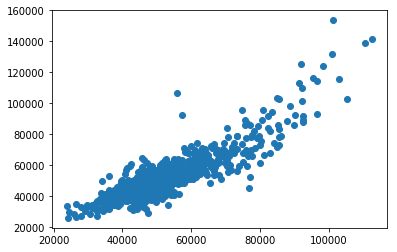

In [33]:
plt.scatter(model.predict(X),y)

#### linearity is evident

### Check for normality (residuals are normally distributed)

0.9099473872210989

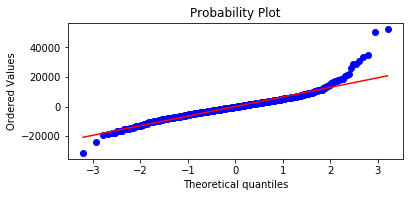

In [34]:
# stats.probplot(est2.resid, plot= plt)
# plt.title("Model1 Residuals Probability Plot")
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = stats.probplot(est2.resid, plot=ax, fit=True)
r**2

#### Model's residuals largely follow a normal distribrution but only for 75% of the plot so lets make some checks;

#### The Kolmogorov-Smirnov test is close to significant (not what we want);

In [35]:
stats.kstest(est2.resid, 'norm')

KstestResult(statistic=0.5224171539961013, pvalue=3.575135485758363e-261)

#### But the good R2 fit indicates that normality is a reasonable approximation - lets repeat the normality test after checking for multicollinearity, autocorrelation, homoscedasticity and variable tarnsformation (if required)

### Check multicolinearity;

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
# check the dependant variable y
variables_endogenous = est2.model.endog
variables_endogenous

array([35500., 48400., 52000., ..., 49000., 57200., 46200.])

In [38]:
variables_exogenous = est2.model.exog
variables_exogenous

array([[1.00000000e+00, 5.25600000e-01, 8.27000000e+02, ...,
        2.05257732e+01, 3.07219107e+04, 4.83100000e-01],
       [1.00000000e+00, 8.56900000e-01, 1.10700000e+03, ...,
        2.34921398e+01, 5.11565891e+04, 4.16900000e-01],
       [1.00000000e+00, 8.20300000e-01, 1.21900000e+03, ...,
        2.37187230e+01, 5.48539021e+04, 5.73300000e-01],
       ...,
       [1.00000000e+00, 5.96379127e-01, 9.23000000e+02, ...,
        2.73518518e+01, 5.26912485e+04, 4.01700000e-01],
       [1.00000000e+00, 6.26517667e-01, 1.08900000e+03, ...,
        2.17662941e+01, 8.04627232e+04, 4.66900000e-01],
       [1.00000000e+00, 6.94800000e-01, 1.01600000e+03, ...,
        2.27544179e+01, 5.66485426e+04, 4.50200000e-01]])

In [39]:
vif = [variance_inflation_factor(variables_exogenous, i) for i in range(variables_exogenous.shape[1])]
vif 

[963.1809043291555,
 1.5219305764398305,
 4.802696875241754,
 5.342892026502119,
 2.474247618790815,
 1.126487203806874,
 4.465629342070656,
 5.103761835363032,
 5.765179756485603,
 3.7148514510833106,
 2.8809359860726875,
 1.91184763920021,
 1.856363245661731,
 6.353126851386051,
 1.2435368148039163]

#### the vif results are corroborated by a cross correlation matrix;

In [40]:
# X.corr()

In [41]:
X.columns

Index(['ADM_RATE_ALL', 'SAT_AVG_ALL', 'TUITFTE', 'AVGFACSAL', 'PFTFAC',
       'PCTPELL', 'COSTT4_A', 'C150_4', 'RET_FT4', 'CDR3', 'GRAD_DEBT_MDN',
       'AGE_ENTRY', 'FAMINC', 'UGDS_MEN'],
      dtype='object')

#### Ignoring the 1st VIF term (intercept), initially remove independant variables with VIF > 4

In [42]:
X = data[['ADM_RATE_ALL', 'AVGFACSAL', 'PFTFAC','RET_FT4', 'CDR3', 'GRAD_DEBT_MDN',
       'AGE_ENTRY', 'UGDS_MEN']]

In [43]:
X.head(2)

,ADM_RATE_ALL,AVGFACSAL,PFTFAC,RET_FT4,CDR3,GRAD_DEBT_MDN,AGE_ENTRY,UGDS_MEN
0,0.5256,6892.0,0.8967,0.6595,0.172,32750.0,20.525773,0.4831
1,0.8569,9957.0,0.9072,0.8288,0.062,20750.0,23.492140,0.4169


In [44]:
print(X.shape, y.shape)

(1026, 8) (1026,)


In [45]:
# Fit Model
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
print(model.coef_)
print(model.intercept_)

[-1.28581882e+04  3.54968220e+00 -4.11190825e+02  1.04850666e+04
 -9.03544134e+04  6.82460185e-02  4.30754737e+02  1.84023937e+04]
10505.50325432494


In [47]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
est2.summary()

C:\Users\Chart\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        MN_EARN_WNE_P10   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     311.1
Date:                Mon, 29 Jul 2019   Prob (F-statistic):          3.99e-267
Time:                        18:59:26   Log-Likelihood:                -10633.
No. Observations:                1026   AIC:                         2.128e+04
Df Residuals:                    1017   BIC:                         2.133e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.051e+04   5354.712      1.962      0.050      -2.044     2.1e+04
ADM_RATE_ALL  -1.286e+04   1410.607     -9.115      0.000   -1.56e+04   -1.01e+04
AVGFACSAL         3.5497      0.160     22.159      0.000       3.235       3.864
PFTFAC         -411.1908   1081.818     -0.380      0.704   -2534.041    1711.659
RET_FT4        1.049e+04   3418.174      3.067      0.002    3777.587    1.72e+04
CDR3          -9.035e+04   7763.509    -11.638      0.000   -1.06e+05   -7.51e+04
GRAD_DEBT_MDN     0.0682      0.060      1.132      0.258      -0.050       0.187
AGE_ENTRY       430.7547    120.450      3.576      0.000     194.396     667.114
UGDS_MEN        1.84e+04   2396.736      7.678      0.000    1.37e+04    2.31e+04
==============================================================================
Omnibus:                      387.082   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2901.369
Skew:                           1.535   Prob(JB):                         0.00
Kurtosis:                      10.645   Cond. No.                     8.67e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
est2.pvalues

const            5.004450e-02
ADM_RATE_ALL     4.078902e-19
AVGFACSAL        4.414957e-89
PFTFAC           7.039561e-01
RET_FT4          2.216062e-03
CDR3             1.768491e-29
GRAD_DEBT_MDN    2.579564e-01
AGE_ENTRY        3.650133e-04
UGDS_MEN         3.779998e-14
dtype: float64

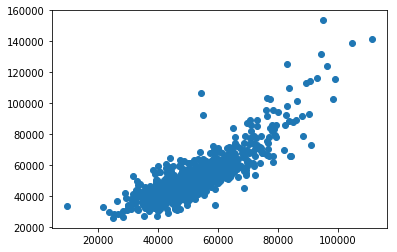

In [49]:
plt.scatter(model.predict(X),y)

In [50]:
variables_exogenous = est2.model.exog
variables_exogenous

array([[1.00000000e+00, 5.25600000e-01, 6.89200000e+03, ...,
        3.27500000e+04, 2.05257732e+01, 4.83100000e-01],
       [1.00000000e+00, 8.56900000e-01, 9.95700000e+03, ...,
        2.07500000e+04, 2.34921398e+01, 4.16900000e-01],
       [1.00000000e+00, 8.20300000e-01, 9.30200000e+03, ...,
        2.32500000e+04, 2.37187230e+01, 5.73300000e-01],
       ...,
       [1.00000000e+00, 5.96379127e-01, 5.37400000e+03, ...,
        2.50000000e+04, 2.73518518e+01, 4.01700000e-01],
       [1.00000000e+00, 6.26517667e-01, 4.41500000e+03, ...,
        2.69330000e+04, 2.17662941e+01, 4.66900000e-01],
       [1.00000000e+00, 6.94800000e-01, 5.56600000e+03, ...,
        1.48750000e+04, 2.27544179e+01, 4.50200000e-01]])

In [51]:
vif = [variance_inflation_factor(variables_exogenous, i) for i in range(variables_exogenous.shape[1])]
vif 

[496.35433761561717,
 1.1901595707418284,
 2.106203356421876,
 1.068561636057157,
 2.457063934430026,
 1.872358787640253,
 1.2005753299952973,
 1.3814809150763891,
 1.1410399290749427]

#### multicolinearity seems fine as below but p-values for 'PFTFAC ' & 'GRAD_DEBT_MDN' are now too high;

In [52]:
X = data[['ADM_RATE_ALL', 'AVGFACSAL','RET_FT4', 'CDR3',
       'AGE_ENTRY', 'UGDS_MEN']]

In [53]:
X.head(2)

,ADM_RATE_ALL,AVGFACSAL,RET_FT4,CDR3,AGE_ENTRY,UGDS_MEN
0,0.5256,6892.0,0.6595,0.172,20.525773,0.4831
1,0.8569,9957.0,0.8288,0.062,23.492140,0.4169


In [54]:
print(X.shape, y.shape)

(1026, 6) (1026,)


#### All now looks fine although the R2 value for the model has dropped as independant variables have been removed (expected);

In [55]:
# Fit Model
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [56]:
print(model.coef_)
print(model.intercept_)

[-1.26920525e+04  3.51357636e+00  1.03017200e+04 -9.00623021e+04
  3.97403280e+02  1.79996492e+04]
13031.225047684173


In [57]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
est2.summary()

C:\Users\Chart\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        MN_EARN_WNE_P10   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     414.8
Date:                Mon, 29 Jul 2019   Prob (F-statistic):          2.01e-269
Time:                        18:59:26   Log-Likelihood:                -10634.
No. Observations:                1026   AIC:                         2.128e+04
Df Residuals:                    1019   BIC:                         2.132e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.303e+04   4707.798      2.768      0.006    3793.137    2.23e+04
ADM_RATE_ALL -1.269e+04   1403.618     -9.042      0.000   -1.54e+04   -9937.741
AVGFACSAL        3.5136      0.157     22.386      0.000       3.206       3.822
RET_FT4        1.03e+04   3412.094      3.019      0.003    3606.187     1.7e+04
CDR3         -9.006e+04   7625.934    -11.810      0.000   -1.05e+05   -7.51e+04
AGE_ENTRY      397.4033    115.720      3.434      0.001     170.326     624.480
UGDS_MEN        1.8e+04   2362.377      7.619      0.000    1.34e+04    2.26e+04
==============================================================================
Omnibus:                      381.150   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2805.052
Skew:                           1.513   Prob(JB):                         0.00
Kurtosis:                      10.514   Cond. No.                     2.84e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
variables_exogenous = est2.model.exog
variables_exogenous

array([[1.00000000e+00, 5.25600000e-01, 6.89200000e+03, ...,
        1.72000000e-01, 2.05257732e+01, 4.83100000e-01],
       [1.00000000e+00, 8.56900000e-01, 9.95700000e+03, ...,
        6.20000000e-02, 2.34921398e+01, 4.16900000e-01],
       [1.00000000e+00, 8.20300000e-01, 9.30200000e+03, ...,
        6.10000000e-02, 2.37187230e+01, 5.73300000e-01],
       ...,
       [1.00000000e+00, 5.96379127e-01, 5.37400000e+03, ...,
        8.80000000e-02, 2.73518518e+01, 4.01700000e-01],
       [1.00000000e+00, 6.26517667e-01, 4.41500000e+03, ...,
        5.70000000e-02, 2.17662941e+01, 4.66900000e-01],
       [1.00000000e+00, 6.94800000e-01, 5.56600000e+03, ...,
        9.30000000e-02, 2.27544179e+01, 4.50200000e-01]])

#### verify multicollinearity one more time;

In [59]:
X.columns

Index(['ADM_RATE_ALL', 'AVGFACSAL', 'RET_FT4', 'CDR3', 'AGE_ENTRY',
       'UGDS_MEN'],
      dtype='object')

In [60]:
vif = [variance_inflation_factor(variables_exogenous, i) for i in range(variables_exogenous.shape[1])]
vif 

[383.8636268927971,
 1.178996781689968,
 2.022856891934319,
 2.4495807122205417,
 1.807509946360338,
 1.275764130574266,
 1.1091253539369543]

In [61]:
# X.corr()

### Examine non linearity for independant variables with largest coefficients;

In [62]:
print(model.coef_)
print(model.intercept_)

[-1.26920525e+04  3.51357636e+00  1.03017200e+04 -9.00623021e+04
  3.97403280e+02  1.79996492e+04]
13031.225047684173


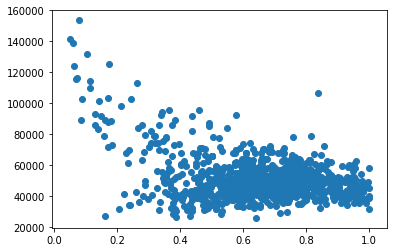

In [63]:
z = data['ADM_RATE_ALL']
plt.scatter(z, y)

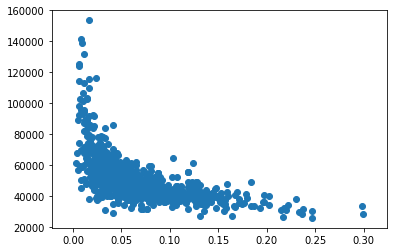

In [64]:
p = data['CDR3']
plt.scatter(p, y)

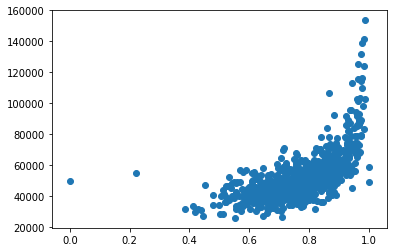

In [65]:
x = data['RET_FT4']
plt.scatter(x, y)

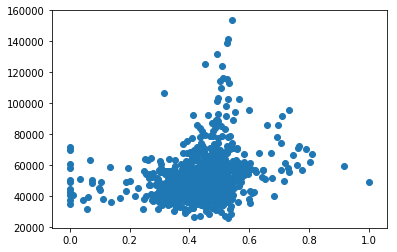

In [66]:
t = data['UGDS_MEN']
plt.scatter(t, y)

#### A logaritmic function may work better CDR3 and RET_FT4

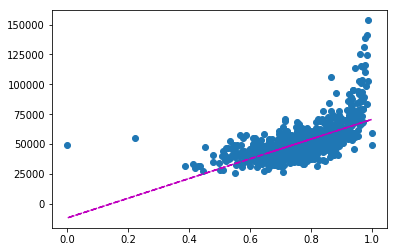

r-squared: 0.40700047056682304
p value: 2.4836968630129423e-118
Standard Error: 3107.09423159764
Slope: 82371.06560162708
Intercept: -11800.14975291791


In [67]:
from scipy.stats import linregress

(slope, intercept, _, _, _) = linregress(x, y)
fit = slope * x + intercept
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=0, marker='o')
ax.plot(x, intercept + slope*x, 'm--')
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)
print("p value:", p_value)
print("Standard Error:", std_err)
print("Slope:", slope)
print("Intercept:", intercept)

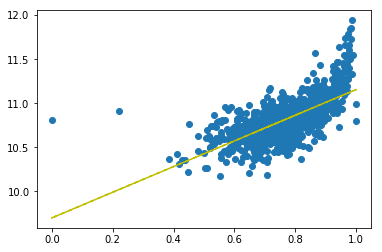

r-squared: 0.4545190188052797
p value: 6.288736028147204e-137
Standard Error: 0.049850481179351466
Slope: 1.456148129643465
Intercept: 9.699375553489773


In [68]:
y = np.log(data['MN_EARN_WNE_P10'])
(slope, intercept, _, _, _) = linregress(x, y)
fit = slope * x + intercept
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=0, marker='o')
ax.plot(x, intercept + slope*x, 'y--')

# #plt.savefig("../Images/Injuries vs Weekly Avg Min Temp")
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)
print("p value:", p_value)
print("Standard Error:", std_err)
print("Slope:", slope)
print("Intercept:", intercept)

#### Natural Log Transformation certainly helps remove non linearity but lets check again after removing evident outliers

In [69]:
y = data['MN_EARN_WNE_P10']

In [70]:
y.head(2)

0    35500.0
1    48400.0
Name: MN_EARN_WNE_P10, dtype: float64

### Stats Check
#### In Excel MSE is Residual Sum of Squares / (n - df) whereas in sklearn it's ResdidualSS / n
#### R2 = RegressionSS / TotalSS
#### where ResidualSS = sum{(y - y predicted)^2}, RegressionSS = sum{(y - average(y))^2}, TotalSS = ResidualSS + RegressionSS

In [71]:
from sklearn.metrics import mean_squared_error, r2_score
predicted = model.predict(X)
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 58834615.3719856
R-squared (R2 ): 0.709484152910821


#### Root Mean Squared Error can be considered the standard deviation of of the residual or unexplained variance:

In [72]:
RSME = np.sqrt(mse)
RSME

7670.372570611261

#### Calculate Durbin-Watson to check auto correlation

In [73]:
from statsmodels.tools.sm_exceptions import ValueWarning
resids = est2.resid
def durbin_watson(resids, axis=0):
    resids = np.asarray(resids)
    diff_resids = np.diff(resids, 1, axis=axis)
    dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)
    return dw

In [74]:
durbin_watson(resids)

1.8679580660349768

#### Durbin-Watson close to 2 implies limited auto correlation (particuarly as this is not time series data)

### Residuals, Standardized and Studentized Residuals

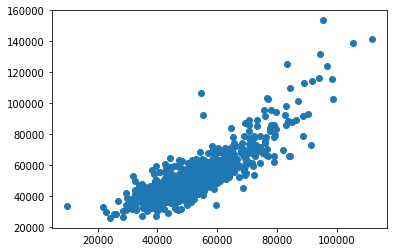

In [75]:
# repeat of plt.scatter(model.predict(X),y)
predictions = model.predict(X)
plt.scatter(predictions,y)

##### Plot Residuals

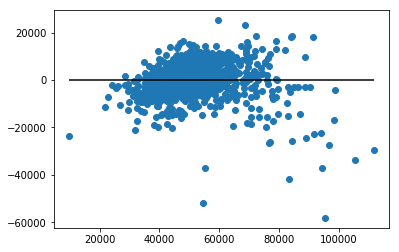

In [76]:
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

#### Standardized Residual = Residual(i) / SQRT (MSE(1 - leverage)
#### Leverage = distance of point from the mean value
#### However Standardized Residual in Excel = Residual(i) / SQRT(MSE) where MSE is calculated as ResidualSS/(n-1)
#### but the Excel MSE calculated via the Data Analysis Tool Pak = ResidualSS/(n-1 - degrees of freedom)

In [77]:
# from statsmodels fit linear model to cleaned and nat log adjusted etc dataset
initial = sm.OLS(y, X2)
results = initial.fit()

In [78]:
# create instance of influence
influence = results.get_influence()

##### Leverage = distance of point from the centre of the data or mean value

In [79]:
# leverage (hat values)
leverage = influence.hat_matrix_diag
leverage

array([0.01014189, 0.00554416, 0.0053703 , ..., 0.02793399, 0.0109803 ,
       0.00618461])

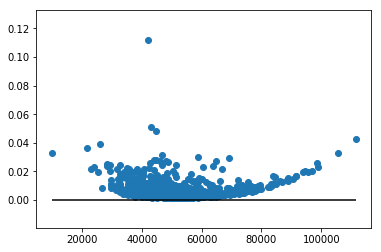

In [80]:
plt.scatter(predictions, leverage)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

##### Cooks distance summarizes how much all the values in the regression model change when the ith observation is removed

##### Typically better than Leverage in determining outliers

In [81]:
# Cook's D values (and p-values) as tuple of arrays
cooks_d = influence.cooks_distance
cooks_d

(array([0.0002607 , 0.00098466, 0.00039352, ..., 0.00124544, 0.00960273,
        0.00040036]),
 array([1.        , 1.        , 1.        , ..., 1.        , 0.99999941,
        1.        ]))

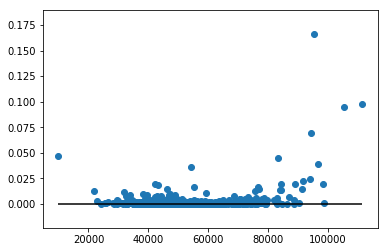

In [82]:
plt.scatter(predictions, cooks_d[0])
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

#### Standardized Residual (see explanation above)

In [83]:
standardized_residuals = influence.resid_studentized_internal
standardized_residuals

array([-0.42203595, -1.11190264, -0.71427011, ...,  0.55079751,
        2.46060512,  0.67107362])

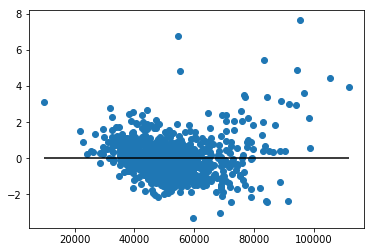

In [84]:
plt.scatter(predictions, standardized_residuals)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

#### Studentized Residual
##### Standardized residuals use the mean square error for the model based on all observations, MSE, while studentized residuals use the mean square error based on the estimated model with the ith observation deleted, MSE(i)
#### Studentized Residual along with Cook's D better for outlier identification
#### If Studentized Residual > 3, data point can be considered an outlier

In [85]:
studentized_residuals = influence.resid_studentized_external
studentized_residuals

array([-0.42186569, -1.11203173, -0.71409833, ...,  0.55060915,
        2.46673667,  0.67089252])

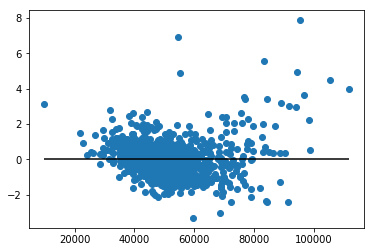

In [86]:
plt.scatter(predictions, studentized_residuals)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

### Make Dataframe with outlier column identifiers included

In [87]:
X.head(2)

,ADM_RATE_ALL,AVGFACSAL,RET_FT4,CDR3,AGE_ENTRY,UGDS_MEN
0,0.5256,6892.0,0.6595,0.172,20.525773,0.4831
1,0.8569,9957.0,0.8288,0.062,23.492140,0.4169


In [88]:
residual_results = pd.DataFrame()

In [89]:
residual_results['UNITID']=data['UNITID']
residual_results['OPEID6']=data['OPEID6']
residual_results['MN_EARN_WNE_P10']=data['MN_EARN_WNE_P10']
residual_results['ADM_RATE_ALL']=X['ADM_RATE_ALL']
residual_results['AVGFACSAL']=X['AVGFACSAL']
residual_results['RET_FT4']=X['RET_FT4']
residual_results['CDR3']=X['CDR3']
residual_results['AGE_ENTRY']=X['AGE_ENTRY']
residual_results['UGDS_MEN']=X['UGDS_MEN']
residual_results.head()

,UNITID,OPEID6,MN_EARN_WNE_P10,ADM_RATE_ALL,AVGFACSAL,RET_FT4,CDR3,AGE_ENTRY,UGDS_MEN
0,100654,1002,35500.0,0.5256,6892.0,0.6595,0.172,20.525773,0.4831
1,100663,1052,48400.0,0.8569,9957.0,0.8288,0.062,23.492140,0.4169
3,100706,1055,52000.0,0.8203,9302.0,0.7696,0.061,23.718723,0.5733
4,100724,1005,30600.0,0.5326,6609.0,0.5725,0.156,20.528185,0.3877
5,100751,1051,51600.0,0.5105,9667.0,0.8670,0.063,21.356529,0.4580


In [90]:
residual_results['Leverage'] = leverage
residual_results['Cooks Distance'] = cooks_d[0]
residual_results['Standardized Residuals'] = standardized_residuals
residual_results['Studentized Residuals'] = studentized_residuals

In [91]:
residual_results.head()

,UNITID,OPEID6,MN_EARN_WNE_P10,ADM_RATE_ALL,AVGFACSAL,RET_FT4,CDR3,AGE_ENTRY,UGDS_MEN,Leverage,Cooks Distance,Standardized Residuals,Studentized Residuals
0,100654,1002,35500.0,0.5256,6892.0,0.6595,0.172,20.525773,0.4831,0.010142,0.000261,-0.422036,-0.421866
1,100663,1052,48400.0,0.8569,9957.0,0.8288,0.062,23.492140,0.4169,0.005544,0.000985,-1.111903,-1.112032
3,100706,1055,52000.0,0.8203,9302.0,0.7696,0.061,23.718723,0.5733,0.005370,0.000394,-0.714270,-0.714098
4,100724,1005,30600.0,0.5326,6609.0,0.5725,0.156,20.528185,0.3877,0.010012,0.000851,-0.767443,-0.767288
5,100751,1051,51600.0,0.5105,9667.0,0.8670,0.063,21.356529,0.4580,0.002588,0.000498,-1.158667,-1.158862


In [92]:
leverage_df = residual_results.sort_values("Leverage", ascending=False)
leverage_df.head()

,UNITID,OPEID6,MN_EARN_WNE_P10,ADM_RATE_ALL,AVGFACSAL,RET_FT4,CDR3,AGE_ENTRY,UGDS_MEN,Leverage,Cooks Distance,Standardized Residuals,Studentized Residuals
1728,414878,1839,49600.0,0.757525,8480.0,0.0000,0.082,23.623472,0.3856,0.111976,0.018978,1.026420,1.026447
1457,227243,4072,54900.0,0.577391,7342.0,0.2209,0.088,26.145374,0.3863,0.050988,0.018711,1.561331,1.562434
288,140553,1582,49000.0,0.840300,7004.0,0.8302,0.184,19.780273,1.0000,0.048033,0.002237,0.557077,0.556888
1687,243744,1305,141300.0,0.050900,20650.0,0.9845,0.008,19.581731,0.5278,0.042449,0.098189,3.937552,3.965907
1105,201690,3026,28600.0,0.377200,6438.0,0.5109,0.299,21.268335,0.4647,0.039148,0.000683,0.342600,0.342451


In [93]:
residual_results.set_index('OPEID6', inplace=True)
residual_results.head(2)

,UNITID,MN_EARN_WNE_P10,ADM_RATE_ALL,AVGFACSAL,RET_FT4,CDR3,AGE_ENTRY,UGDS_MEN,Leverage,Cooks Distance,Standardized Residuals,Studentized Residuals
OPEID6,,,,,,,,,,,,
1002,100654,35500.0,0.5256,6892.0,0.6595,0.172,20.525773,0.4831,0.010142,0.000261,-0.422036,-0.421866
1052,100663,48400.0,0.8569,9957.0,0.8288,0.062,23.492140,0.4169,0.005544,0.000985,-1.111903,-1.112032


In [94]:
# list(data.index.values)

In [95]:
cooks_df = residual_results.sort_values("Cooks Distance", ascending=False)
cooks_df.head(26)

,UNITID,MN_EARN_WNE_P10,ADM_RATE_ALL,AVGFACSAL,RET_FT4,CDR3,AGE_ENTRY,UGDS_MEN,Leverage,Cooks Distance,Standardized Residuals,Studentized Residuals
OPEID6,,,,,,,,,,,,
2178,166683,153600.0,0.078800,16314.0,0.9865,0.017,19.367841,0.5424,0.019551,0.165893,7.631087,7.855094
1305,243744,141300.0,0.050900,20650.0,0.9845,0.008,19.581731,0.5278,0.042449,0.098189,3.937552,3.965907
2155,166027,139100.0,0.059600,18676.0,0.9783,0.009,22.286765,0.5246,0.032658,0.095236,4.443702,4.485191
3378,215062,131600.0,0.103700,15855.0,0.9744,0.011,23.038913,0.4924,0.019971,0.069058,4.870587,4.925872
3524,221856,33500.0,0.581700,2197.0,0.4118,0.298,27.207317,0.4577,0.032564,0.047041,3.127743,3.141323
1445,131496,125200.0,0.173500,13322.0,0.9630,0.006,20.669497,0.4531,0.010474,0.045099,5.461286,5.540289
1426,130794,124400.0,0.063000,16529.0,0.9838,0.006,19.626429,0.5098,0.020567,0.039163,3.613203,3.634789
2165,166656,106500.0,0.840100,8488.0,0.8664,0.010,21.560076,0.3136,0.005382,0.035572,6.783619,6.938775
2627,186131,116300.0,0.074400,16242.0,0.9766,0.024,19.411061,0.5112,0.019656,0.024595,2.930319,2.941300


#### Remove Outliers from Cook's Distance with values > 0.01

In [96]:
residual_results=residual_results.drop([2178,1305,2155,3378,3524,1445,1426,2165,2627,2920,2121,2573,2707,1839,4072,3353,2219,3242,3495,1315,1417,1348,3030,2992,1443], axis=0)

In [97]:
residual_results.shape

(994, 12)

In [98]:
studentized_df = residual_results.sort_values("Studentized Residuals", ascending=False)
studentized_df.head(13)

,UNITID,MN_EARN_WNE_P10,ADM_RATE_ALL,AVGFACSAL,RET_FT4,CDR3,AGE_ENTRY,UGDS_MEN,Leverage,Cooks Distance,Standardized Residuals,Studentized Residuals
OPEID6,,,,,,,,,,,,
2032,160904,64500.0,0.659900,8131.0,0.7077,0.103,20.229778,0.2702,0.007376,0.007482,2.654897,2.662819
2246,169327,59500.0,0.792900,4765.0,0.7209,0.078,27.690037,0.4749,0.008779,0.008478,2.588646,2.595925
1329,120883,84200.0,0.549000,10193.0,0.8595,0.033,20.696858,0.4842,0.002373,0.002186,2.536590,2.543387
3329,479956,57200.0,0.626518,4415.0,0.5682,0.057,21.766294,0.4669,0.010980,0.009603,2.460605,2.466737
3024,201645,89300.0,0.383100,10401.0,0.9312,0.012,19.527079,0.5444,0.005817,0.004866,2.412618,2.418351
2703,193399,61000.0,0.952100,7255.0,0.6943,0.050,20.155925,0.3052,0.008272,0.006873,2.401765,2.407410
3388,216597,87600.0,0.493300,10551.0,0.9367,0.011,20.830353,0.4766,0.003742,0.003026,2.374614,2.380043
1591,448309,50100.0,0.690701,4188.0,0.7000,0.091,27.833333,0.2009,0.009954,0.007438,2.275658,2.280342
2124,164739,95400.0,0.461100,12401.0,0.9394,0.011,19.667975,0.6002,0.006786,0.004990,2.260991,2.265572


In [99]:
studentized_df.shape

(994, 12)

#### Remove Outliers from Studentized Residuals with values > 3

#### Not required as removing high cook's d already removed high Studentized Residuals

In [100]:
# residual_results=residual_results.drop([2178,2165,1445,3378,3353,2155,1305,1426,2219,3242,2573,2121,3524], axis=0)

In [101]:
X = residual_results[['ADM_RATE_ALL', 'AVGFACSAL','RET_FT4', 'CDR3',
       'AGE_ENTRY', 'UGDS_MEN']]
y = residual_results['MN_EARN_WNE_P10']

In [102]:
print(X.shape, y.shape)

(994, 6) (994,)


In [103]:
# Fit Model
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [104]:
print(model.coef_)
print(model.intercept_)

[-7.81233780e+03  2.91401119e+00  1.19735641e+04 -9.00505826e+04
  2.89841775e+02  1.72503814e+04]
15478.433519989114


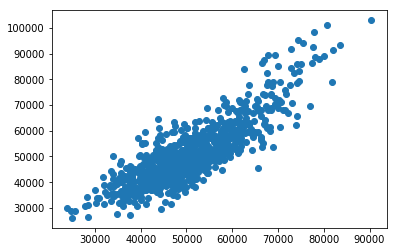

In [105]:
predictions = model.predict(X)
plt.scatter(predictions,y)

In [106]:
from sklearn.metrics import mean_squared_error, r2_score
predicted = model.predict(X)
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 36824165.76351373
R-squared (R2 ): 0.7150156465242419


In [107]:
est2.rsquared_adj

0.7077735591104921

### Check Homoscedasticity again

In [108]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()

C:\Users\Chart\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [109]:
influence2 = est2.get_influence()

In [110]:
cooks_d2 = influence2.cooks_distance

In [111]:
standardized_residuals2 = influence2.resid_studentized_internal
studentized_residuals2 = influence2.resid_studentized_external

In [112]:
print(len(X), len(X2), len(y), len(cooks_d2[0]))

994 994 994 994


In [113]:
print(len(predictions), len(model.predict(X)))

994 994


#### Homoscedasticity has improved;

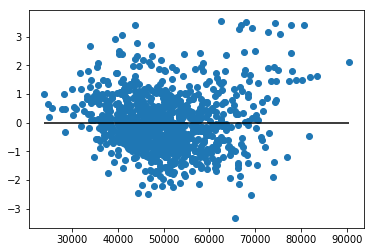

In [114]:
plt.scatter(predictions, standardized_residuals2)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

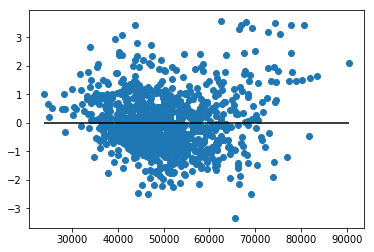

In [115]:
plt.scatter(predictions, studentized_residuals2)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

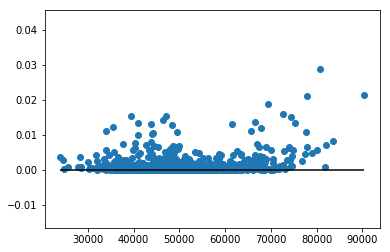

In [116]:
plt.scatter(predictions, cooks_d2[0])
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

### Check independant variable non linearity again;

In [117]:
# Add in Grid Plot - see Project One

In [118]:
est2.params

const           15478.433520
ADM_RATE_ALL    -7812.337797
AVGFACSAL           2.914011
RET_FT4         11973.564101
CDR3           -90050.582647
AGE_ENTRY         289.841775
UGDS_MEN        17250.381360
dtype: float64

In [119]:
X.head(2)

,ADM_RATE_ALL,AVGFACSAL,RET_FT4,CDR3,AGE_ENTRY,UGDS_MEN
OPEID6,,,,,,
1002,0.5256,6892.0,0.6595,0.172,20.525773,0.4831
1052,0.8569,9957.0,0.8288,0.062,23.492140,0.4169


In [120]:
y.head(1)

OPEID6
1002    35500.0
Name: MN_EARN_WNE_P10, dtype: float64

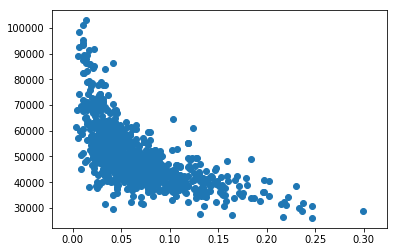

In [121]:
p = residual_results['CDR3']
plt.scatter(p, y)

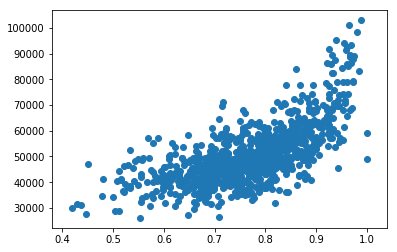

In [122]:
x = residual_results['RET_FT4']
plt.scatter(x, y)

#### Despite the work done so far, a logaritmic transformation of the dependant variable (y) may work better

#### Checking against 'RET_FT4'

In [123]:
print(len(x),len(y))

994 994


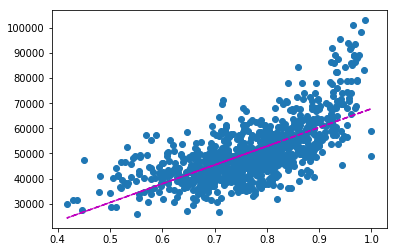

r-squared: 0.4574906952876625
p value: 6.899759268624661e-134
Standard Error: 2580.881221904328
Slope: 74646.8337063916
Intercept: -6857.273308408527


In [124]:
(slope, intercept, _, _, _) = linregress(x, y)
fit = slope * x + intercept
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=0, marker='o')
ax.plot(x, intercept + slope*x, 'm--')
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)
print("p value:", p_value)
print("Standard Error:", std_err)
print("Slope:", slope)
print("Intercept:", intercept)

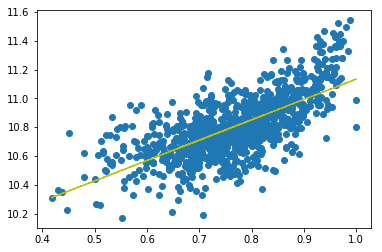

r-squared: 0.47103608436400896
p value: 2.431518640802061e-139
Standard Error: 0.04753516098403795
Slope: 1.4128136128716096
Intercept: 9.720753867034544


In [125]:
y = np.log(residual_results['MN_EARN_WNE_P10'])
(slope, intercept, _, _, _) = linregress(x, y)
fit = slope * x + intercept
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=0, marker='o')
ax.plot(x, intercept + slope*x, 'y--')

# #plt.savefig("../Images/Injuries vs Weekly Avg Min Temp")
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)
print("p value:", p_value)
print("Standard Error:", std_err)
print("Slope:", slope)
print("Intercept:", intercept)

In [126]:
# Fit Model
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [127]:
print(model.coef_)
print(model.intercept_)

[-7.61091033e-02  5.07363492e-05  2.38916336e-01 -1.99913622e+00
  6.41483428e-03  3.19881917e-01]
10.122009871310908


In [128]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()

C:\Users\Chart\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


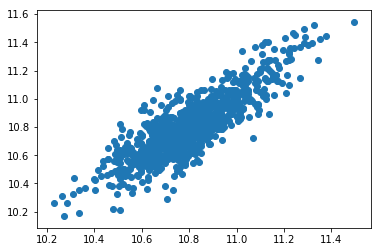

In [129]:
predictions = model.predict(X)
plt.scatter(predictions,y)

In [130]:
predictions

array([10.53160013, 10.92009818, 10.92898978, 10.49740817, 10.93832386,
       10.6350025 , 10.96132479, 10.65256984, 10.66916227, 10.66185391,
       10.64978934, 10.67067432, 10.67678246, 10.55961855, 10.94881331,
       10.72792167, 10.68782096, 10.40420166, 10.65674887, 10.68909713,
       10.99960908, 10.62705696, 10.77467746, 10.90015688, 10.31035335,
       10.67911143, 10.48312881, 10.63622788, 10.82413774, 10.4884508 ,
       10.55111435, 10.45614981, 10.94508732, 10.93818912, 10.869714  ,
       11.001854  , 11.03528264, 10.8326928 , 11.01126845, 10.88165697,
       10.88042318, 10.95392667, 10.95878526, 10.88002388, 10.88347135,
       10.86781938, 11.34275632, 11.17022792, 11.221201  , 11.09401453,
       11.26772092, 11.20908553, 11.13702485, 11.08671678, 10.80585045,
       10.85179449, 10.74455815, 10.75814062, 11.00016809, 10.79420373,
       10.87359086, 11.03301294, 11.05094962, 10.812789  , 10.76010789,
       10.86432985, 11.06009113, 10.66446469, 10.85040673, 10.74

In [131]:
from sklearn.metrics import mean_squared_error, r2_score
predicted = model.predict(X)
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.012463402291082778
R-squared (R2 ): 0.7227639733320563


In [132]:
est2.rsquared

0.7227639733320566

In [133]:
est2.rsquared_adj

0.721078647941978

##### We see a small improvement in r2 and adjusted r2

#### Root Mean Squared Error can be considered the standard deviation of of the residual or unexplained variance:

In [134]:
RSME = np.sqrt(mse)
RSME

0.11163960897048493

#### Check Durbin-Watson for auto correlation again

In [135]:
from statsmodels.tools.sm_exceptions import ValueWarning
resids = est2.resid
def durbin_watson(resids, axis=0):
    resids = np.asarray(resids)
    diff_resids = np.diff(resids, 1, axis=axis)
    dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)
    return dw

In [136]:
durbin_watson(resids)

1.7408776438099898

#### Durbin-Watson close to 2 implies limited auto correlation (particuarly as this is not time series data)

In [137]:
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        MN_EARN_WNE_P10   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     428.9
Date:                Mon, 29 Jul 2019   Prob (F-statistic):          7.13e-271
Time:                        18:59:30   Log-Likelihood:                 768.90
No. Observations:                 994   AIC:                            -1524.
Df Residuals:                     987   BIC:                            -1489.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.1220      0.072    140.192      0.000       9.980      10.264
ADM_RATE_ALL    -0.0761      0.021     -3.608      0.000      -0.118      -0.035
AVGFACSAL     5.074e-05    2.6e-06     19.551      0.000    4.56e-05    5.58e-05
RET_FT4          0.2389      0.056      4.255      0.000       0.129       0.349
CDR3            -1.9991      0.115    -17.362      0.000      -2.225      -1.773
AGE_ENTRY        0.0064      0.002      3.715      0.000       0.003       0.010
UGDS_MEN         0.3199      0.035      9.164      0.000       0.251       0.388
==============================================================================
Omnibus:                        7.985   Durbin-Watson:                   1.741
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                9.781
Skew:                           0.106   Prob(JB):                      0.00752
Kurtosis:                       3.437   Cond. No.                     2.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### remaining high Condition Number and Omnibus relates to a scaling issue rather than multicollinearity - after examining eigen values (est2.eigenvals), see https://stats.stackexchange.com/questions/332428/regression-model-constant-causes-multicollinearity-warning-but-not-in-standardi

#### where condition number = largest eigenvalue / smallest;

In [138]:
est2.eigenvals

array([6.41167392e+10, 4.33641426e+04, 3.59789652e+01, 1.38478135e+01,
       8.53529398e+00, 2.95375317e+00, 7.69300267e-01])

### Check for normality again

In [139]:
y.head(2)

OPEID6
1002    10.477288
1052    10.787255
Name: MN_EARN_WNE_P10, dtype: float64

Text(0.5, 1.0, 'Model2 Residuals Probability Plot')

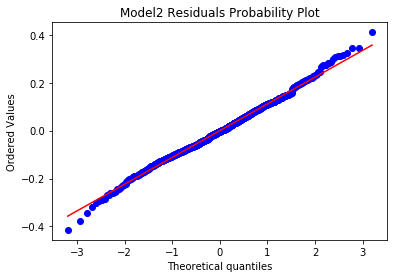

In [140]:
stats.probplot(est2.resid, plot= plt)
plt.title("Model2 Residuals Probability Plot")

#### The Kolmogorov-Smirnov test significance has fallen below 40%

In [141]:
stats.kstest(est2.resid, 'norm')

KstestResult(statistic=0.39252281276822837, pvalue=1.6416820612134886e-138)

#### the residual fit has improved considerably;

In [142]:
# fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = stats.probplot(est2.resid, plot=ax, fit=True)
r**2

0.9959200801012055

In [143]:
print(model.coef_)
print(model.intercept_)

[-7.61091033e-02  5.07363492e-05  2.38916336e-01 -1.99913622e+00
  6.41483428e-03  3.19881917e-01]
10.122009871310908


In [144]:
est2.params

const           10.122010
ADM_RATE_ALL    -0.076109
AVGFACSAL        0.000051
RET_FT4          0.238916
CDR3            -1.999136
AGE_ENTRY        0.006415
UGDS_MEN         0.319882
dtype: float64

### We can conclude that the Model's residuals now largely follow a normal distribrution

#### Train Test

In [145]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [146]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7306718021623144
Testing Score: 0.6978564029602758


Text(0.5, 1.0, 'Residual Plot')

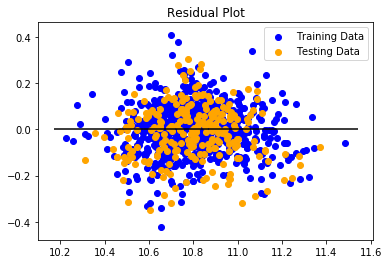

In [147]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [148]:
# R2 for train data
Train_R2 = model.score(X_train, y_train)
Train_R2

0.7306718021623144

In [149]:
# R2 for test data
Test_R2 = model.score(X_test, y_test)
Test_R2

0.6978564029602758

In [150]:
# MSE for test data
Test_MSE = np.mean((model.predict(X_test) - y_test)**2)
Test_MSE

0.014287526625842102

In [151]:
# RSME
Test_RSME = np.sqrt(Test_MSE)
Test_RSME

0.11953044225569527

In [152]:
Test_coeff = model.coef_
Test_coeff

array([-7.69361935e-02,  4.86739619e-05,  2.79367360e-01, -1.97532303e+00,
        6.62783166e-03,  3.51797697e-01])

In [153]:
Test_intercept = model.intercept_
Test_intercept

10.084179003899095

In [154]:
X_train.shape

(745, 6)

In [155]:
X_test.shape

(249, 6)

#### Add Ouput column to dataframe using exponential (y)

In [156]:
final_data = pd.read_excel("US Dept Education data/Output/FourYearUniversitiesChris.xlsx")

In [157]:
# final_data.set_index('UNITID', inplace=True)
# final_data.head(2)

In [158]:
# Model coefficients prior to train test [-7.61091033e-02  5.07363492e-05  2.38916336e-01 -1.99913622e+00 6.41483428e-03  3.19881917e-01]

# Model Intercept prior to train test 10.122009871310908

In [159]:
est2.params

const           10.122010
ADM_RATE_ALL    -0.076109
AVGFACSAL        0.000051
RET_FT4          0.238916
CDR3            -1.999136
AGE_ENTRY        0.006415
UGDS_MEN         0.319882
dtype: float64

In [160]:
final_data['Predicted Final Data LN'] = ((final_data['ADM_RATE_ALL']*-7.61091033e-02)\
            + (final_data['AVGFACSAL']*5.07363492e-05\
              + (final_data['RET_FT4']*2.38916336e-01)\
              + (final_data['CDR3']*-1.99913622e+00)\
              + (final_data['AGE_ENTRY']*6.41483428e-03)\
              + (final_data['UGDS_MEN']*3.19881917e-01))+10.122009871310908)

In [161]:
final_data.head()

,UNITID,OPEID6,13-14 Predicted Final Data LN,13-14 Final_Predicted 10 year earnings,CONTROL,CONTROL.1,TUITIONFEE_IN,TUITIONFEE_OUT,ICLEVEL,PREDDEG,...,SD_EARN_WNE_P10,COUNT_NWNE_P6,COUNT_NWNE_P8,COUNT_NWNE_P10,COUNT_WNE_P6,COUNT_WNE_P8,COUNT_WNE_P10,UGDS_MEN,UGDS_WOMEN,Predicted Final Data LN
0,100654,1002,10.538013,37722.522920,1,Public,9096.0,16596.0,1,3,...,25400.0,94.0,142.0,212.0,1304.0,1485.0,1784.0,0.4831,0.5169,10.531600
1,100663,1052,10.794632,48758.384286,1,Public,7510.0,17062.0,1,3,...,39200.0,241.0,309.0,464.0,2727.0,3048.0,3643.0,0.4169,0.5831,10.920098
2,100690,25034,NaN,47600.000000,2,Private,6900.0,6900.0,1,3,...,38600.0,38.0,51.0,54.0,155.0,198.0,170.0,0.3986,0.6014,NaN
3,100706,1055,10.807532,49391.442044,1,Public,9158.0,21232.0,1,3,...,33600.0,144.0,161.0,213.0,1378.0,1472.0,1475.0,0.5733,0.4267,10.928990
4,100724,1005,10.568757,38900.295097,1,Public,8720.0,15656.0,1,3,...,21400.0,157.0,209.0,244.0,1754.0,1829.0,1832.0,0.3877,0.6123,10.497408


#### cross check results the same as original regression data

In [162]:
# residual_results.set_index('UNITID', inplace=True)
residual_results.head()

,UNITID,MN_EARN_WNE_P10,ADM_RATE_ALL,AVGFACSAL,RET_FT4,CDR3,AGE_ENTRY,UGDS_MEN,Leverage,Cooks Distance,Standardized Residuals,Studentized Residuals
OPEID6,,,,,,,,,,,,
1002,100654,35500.0,0.5256,6892.0,0.6595,0.172,20.525773,0.4831,0.010142,0.000261,-0.422036,-0.421866
1052,100663,48400.0,0.8569,9957.0,0.8288,0.062,23.492140,0.4169,0.005544,0.000985,-1.111903,-1.112032
1055,100706,52000.0,0.8203,9302.0,0.7696,0.061,23.718723,0.5733,0.005370,0.000394,-0.714270,-0.714098
1005,100724,30600.0,0.5326,6609.0,0.5725,0.156,20.528185,0.3877,0.010012,0.000851,-0.767443,-0.767288
1051,100751,51600.0,0.5105,9667.0,0.8670,0.063,21.356529,0.4580,0.002588,0.000498,-1.158667,-1.158862


In [163]:
residual_results['Predicted Final Data LN'] = ((residual_results['ADM_RATE_ALL']*-7.61091033e-02)\
            + (residual_results['AVGFACSAL']*5.07363492e-05\
              + (residual_results['RET_FT4']*2.38916336e-01)\
              + (residual_results['CDR3']*-1.99913622e+00)\
              + (residual_results['AGE_ENTRY']*6.41483428e-03)\
              + (residual_results['UGDS_MEN']*3.19881917e-01))+10.122009871310908)

In [164]:
residual_results.head()

,UNITID,MN_EARN_WNE_P10,ADM_RATE_ALL,AVGFACSAL,RET_FT4,CDR3,AGE_ENTRY,UGDS_MEN,Leverage,Cooks Distance,Standardized Residuals,Studentized Residuals,Predicted Final Data LN
OPEID6,,,,,,,,,,,,,
1002,100654,35500.0,0.5256,6892.0,0.6595,0.172,20.525773,0.4831,0.010142,0.000261,-0.422036,-0.421866,10.531600
1052,100663,48400.0,0.8569,9957.0,0.8288,0.062,23.492140,0.4169,0.005544,0.000985,-1.111903,-1.112032,10.920098
1055,100706,52000.0,0.8203,9302.0,0.7696,0.061,23.718723,0.5733,0.005370,0.000394,-0.714270,-0.714098,10.928990
1005,100724,30600.0,0.5326,6609.0,0.5725,0.156,20.528185,0.3877,0.010012,0.000851,-0.767443,-0.767288,10.497408
1051,100751,51600.0,0.5105,9667.0,0.8670,0.063,21.356529,0.4580,0.002588,0.000498,-1.158667,-1.158862,10.938324


In [165]:
residual_results['dependant_variable y'] = np.log(residual_results['MN_EARN_WNE_P10'])
residual_results.head()

,UNITID,MN_EARN_WNE_P10,ADM_RATE_ALL,AVGFACSAL,RET_FT4,CDR3,AGE_ENTRY,UGDS_MEN,Leverage,Cooks Distance,Standardized Residuals,Studentized Residuals,Predicted Final Data LN,dependant_variable y
OPEID6,,,,,,,,,,,,,,
1002,100654,35500.0,0.5256,6892.0,0.6595,0.172,20.525773,0.4831,0.010142,0.000261,-0.422036,-0.421866,10.531600,10.477288
1052,100663,48400.0,0.8569,9957.0,0.8288,0.062,23.492140,0.4169,0.005544,0.000985,-1.111903,-1.112032,10.920098,10.787255
1055,100706,52000.0,0.8203,9302.0,0.7696,0.061,23.718723,0.5733,0.005370,0.000394,-0.714270,-0.714098,10.928990,10.858999
1005,100724,30600.0,0.5326,6609.0,0.5725,0.156,20.528185,0.3877,0.010012,0.000851,-0.767443,-0.767288,10.497408,10.328755
1051,100751,51600.0,0.5105,9667.0,0.8670,0.063,21.356529,0.4580,0.002588,0.000498,-1.158667,-1.158862,10.938324,10.851277


In [166]:
# final_data_1st_point = final_data.loc[100654, "MN_EARN_WNE_P10"]
# final_data_1st_point

In [167]:
final_data['Final_Predicted 10 year earnings'] = np.exp(final_data['Predicted Final Data LN'])
final_data.head(2)

,UNITID,OPEID6,13-14 Predicted Final Data LN,13-14 Final_Predicted 10 year earnings,CONTROL,CONTROL.1,TUITIONFEE_IN,TUITIONFEE_OUT,ICLEVEL,PREDDEG,...,COUNT_NWNE_P6,COUNT_NWNE_P8,COUNT_NWNE_P10,COUNT_WNE_P6,COUNT_WNE_P8,COUNT_WNE_P10,UGDS_MEN,UGDS_WOMEN,Predicted Final Data LN,Final_Predicted 10 year earnings
0,100654,1002,10.538013,37722.522920,1,Public,9096.0,16596.0,1,3,...,94.0,142.0,212.0,1304.0,1485.0,1784.0,0.4831,0.5169,10.531600,37481.401417
1,100663,1052,10.794632,48758.384286,1,Public,7510.0,17062.0,1,3,...,241.0,309.0,464.0,2727.0,3048.0,3643.0,0.4169,0.5831,10.920098,55276.225605


In [168]:
# final_data.reset_index()

In [169]:
# For Cross Checking 1st row Prediction array from model completion earlier array([10.53160013, 10.92009818, 10.92898978, 10.49740817, 10.93832386, ..

In [170]:
# array([10.53160013, 10.92009818, 10.92898978, 10.49740817, 10.93832386,

In [171]:
predictions

array([10.53160013, 10.92009818, 10.92898978, 10.49740817, 10.93832386,
       10.6350025 , 10.96132479, 10.65256984, 10.66916227, 10.66185391,
       10.64978934, 10.67067432, 10.67678246, 10.55961855, 10.94881331,
       10.72792167, 10.68782096, 10.40420166, 10.65674887, 10.68909713,
       10.99960908, 10.62705696, 10.77467746, 10.90015688, 10.31035335,
       10.67911143, 10.48312881, 10.63622788, 10.82413774, 10.4884508 ,
       10.55111435, 10.45614981, 10.94508732, 10.93818912, 10.869714  ,
       11.001854  , 11.03528264, 10.8326928 , 11.01126845, 10.88165697,
       10.88042318, 10.95392667, 10.95878526, 10.88002388, 10.88347135,
       10.86781938, 11.34275632, 11.17022792, 11.221201  , 11.09401453,
       11.26772092, 11.20908553, 11.13702485, 11.08671678, 10.80585045,
       10.85179449, 10.74455815, 10.75814062, 11.00016809, 10.79420373,
       10.87359086, 11.03301294, 11.05094962, 10.812789  , 10.76010789,
       10.86432985, 11.06009113, 10.66446469, 10.85040673, 10.74

In [172]:
# final_data.to_csv("US Dept Education data/Output/2014-2015_predicted_earnings.csv", index=False, header=True)

### Alternatively lets examine transforming the the non linear independant variables:

In [173]:
X.head(2)

,ADM_RATE_ALL,AVGFACSAL,RET_FT4,CDR3,AGE_ENTRY,UGDS_MEN
OPEID6,,,,,,
1002,0.5256,6892.0,0.6595,0.172,20.525773,0.4831
1052,0.8569,9957.0,0.8288,0.062,23.492140,0.4169


In [174]:
y.head(2)

OPEID6
1002    10.477288
1052    10.787255
Name: MN_EARN_WNE_P10, dtype: float64

In [175]:
y = residual_results['MN_EARN_WNE_P10']
y.head(2)

OPEID6
1002    35500.0
1052    48400.0
Name: MN_EARN_WNE_P10, dtype: float64

In [176]:
residual_results['RET_FT4_transform']=np.log(X['RET_FT4']/(1-X['RET_FT4']))
residual_results.head(2)

,UNITID,MN_EARN_WNE_P10,ADM_RATE_ALL,AVGFACSAL,RET_FT4,CDR3,AGE_ENTRY,UGDS_MEN,Leverage,Cooks Distance,Standardized Residuals,Studentized Residuals,Predicted Final Data LN,dependant_variable y,RET_FT4_transform
OPEID6,,,,,,,,,,,,,,,
1002,100654,35500.0,0.5256,6892.0,0.6595,0.172,20.525773,0.4831,0.010142,0.000261,-0.422036,-0.421866,10.531600,10.477288,0.661067
1052,100663,48400.0,0.8569,9957.0,0.8288,0.062,23.492140,0.4169,0.005544,0.000985,-1.111903,-1.112032,10.920098,10.787255,1.577146


In [177]:
residual_results['CDR3_transform']=np.log(X['CDR3']/(1-X['CDR3']))
residual_results.head(2)

,UNITID,MN_EARN_WNE_P10,ADM_RATE_ALL,AVGFACSAL,RET_FT4,CDR3,AGE_ENTRY,UGDS_MEN,Leverage,Cooks Distance,Standardized Residuals,Studentized Residuals,Predicted Final Data LN,dependant_variable y,RET_FT4_transform,CDR3_transform
OPEID6,,,,,,,,,,,,,,,,
1002,100654,35500.0,0.5256,6892.0,0.6595,0.172,20.525773,0.4831,0.010142,0.000261,-0.422036,-0.421866,10.531600,10.477288,0.661067,-1.571519
1052,100663,48400.0,0.8569,9957.0,0.8288,0.062,23.492140,0.4169,0.005544,0.000985,-1.111903,-1.112032,10.920098,10.787255,1.577146,-2.716616


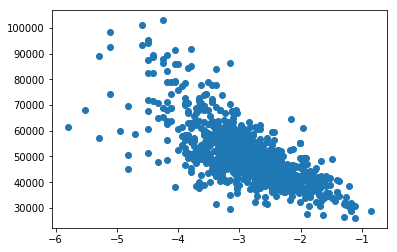

In [178]:
e = residual_results['CDR3_transform']
plt.scatter(e, y)

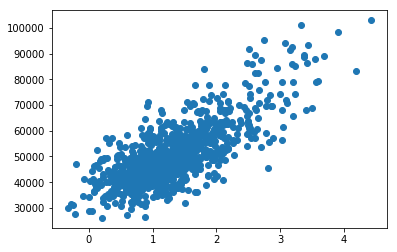

In [179]:
f = residual_results['RET_FT4_transform']
plt.scatter(f, y)

In [180]:
y.head(2)

OPEID6
1002    35500.0
1052    48400.0
Name: MN_EARN_WNE_P10, dtype: float64

In [181]:
X.head(2)

,ADM_RATE_ALL,AVGFACSAL,RET_FT4,CDR3,AGE_ENTRY,UGDS_MEN
OPEID6,,,,,,
1002,0.5256,6892.0,0.6595,0.172,20.525773,0.4831
1052,0.8569,9957.0,0.8288,0.062,23.492140,0.4169


In [182]:
X = residual_results[['ADM_RATE_ALL', 'AVGFACSAL','RET_FT4_transform', 'CDR3_transform',
       'AGE_ENTRY', 'UGDS_MEN']]

In [183]:
X.head(2)

,ADM_RATE_ALL,AVGFACSAL,RET_FT4_transform,CDR3_transform,AGE_ENTRY,UGDS_MEN
OPEID6,,,,,,
1002,0.5256,6892.0,0.661067,-1.571519,20.525773,0.4831
1052,0.8569,9957.0,1.577146,-2.716616,23.492140,0.4169


In [184]:
print(len(X), len(y))

994 994


In [185]:
residual_results.head(2)

,UNITID,MN_EARN_WNE_P10,ADM_RATE_ALL,AVGFACSAL,RET_FT4,CDR3,AGE_ENTRY,UGDS_MEN,Leverage,Cooks Distance,Standardized Residuals,Studentized Residuals,Predicted Final Data LN,dependant_variable y,RET_FT4_transform,CDR3_transform
OPEID6,,,,,,,,,,,,,,,,
1002,100654,35500.0,0.5256,6892.0,0.6595,0.172,20.525773,0.4831,0.010142,0.000261,-0.422036,-0.421866,10.531600,10.477288,0.661067,-1.571519
1052,100663,48400.0,0.8569,9957.0,0.8288,0.062,23.492140,0.4169,0.005544,0.000985,-1.111903,-1.112032,10.920098,10.787255,1.577146,-2.716616


In [186]:
residual_results = residual_results.dropna(how='any')

In [187]:
print(len(X), len(y))

994 994


In [188]:
RET_FT4_transform_df = residual_results.sort_values("RET_FT4_transform", ascending=False)
RET_FT4_transform_df.head()

,UNITID,MN_EARN_WNE_P10,ADM_RATE_ALL,AVGFACSAL,RET_FT4,CDR3,AGE_ENTRY,UGDS_MEN,Leverage,Cooks Distance,Standardized Residuals,Studentized Residuals,Predicted Final Data LN,dependant_variable y,RET_FT4_transform,CDR3_transform
OPEID6,,,,,,,,,,,,,,,,
3702,449931,49000.0,0.596379,5374.0,1.0000,0.088,27.351852,0.4017,0.027934,0.001245,0.550798,0.550609,10.716224,10.799576,inf,-2.338303
3313,244190,59100.0,0.650064,12837.0,1.0000,0.046,21.386364,0.1348,0.021421,0.003340,-1.033464,-1.033499,11.051103,10.986986,inf,-3.032022
1774,144050,103000.0,0.087600,17082.0,0.9881,0.014,21.276335,0.5273,0.022985,0.001023,0.551668,0.551480,11.495264,11.542484,4.419246,-4.254599
2115,164465,83300.0,0.138400,12035.0,0.9850,0.015,19.801762,0.5173,0.010527,0.000367,0.491467,0.491284,11.219934,11.330204,4.184591,-4.184591
1840,152080,98400.0,0.211400,13102.0,0.9802,0.006,19.512293,0.5225,0.009683,0.005574,1.997640,2.000581,11.285165,11.496796,3.902075,-5.109978


In [189]:
RET_FT4_transform_df = residual_results.sort_values("RET_FT4_transform", ascending=True)
RET_FT4_transform_df.head()

,UNITID,MN_EARN_WNE_P10,ADM_RATE_ALL,AVGFACSAL,RET_FT4,CDR3,AGE_ENTRY,UGDS_MEN,Leverage,Cooks Distance,Standardized Residuals,Studentized Residuals,Predicted Final Data LN,dependant_variable y,RET_FT4_transform,CDR3_transform
OPEID6,,,,,,,,,,,,,,,,
2968,199582,30000.0,0.7403,5253.0,0.4180,0.233,21.143406,0.5069,0.021891,0.002750,0.927461,0.927398,10.264032,10.308953,-0.330989,-1.191448
2284,170842,31600.0,0.4842,6030.0,0.4294,0.072,27.710383,0.2951,0.022470,0.006535,-1.410772,-1.411458,10.621906,10.360912,-0.284300,-2.556366
1968,157058,31300.0,0.4769,6179.0,0.4372,0.220,23.035235,0.3848,0.019954,0.000170,0.241549,0.241437,10.334715,10.351373,-0.252534,-1.265666
3499,220598,27500.0,0.4327,4817.0,0.4469,0.131,20.919000,0.5198,0.017926,0.002481,-0.975361,-0.975338,10.478826,10.221941,-0.213204,-1.892146
3663,229780,47200.0,0.9774,4652.0,0.4508,0.098,29.855491,0.5151,0.019857,0.008784,1.742107,1.743851,10.551724,10.762149,-0.197439,-2.219647


In [190]:
CDR3_transform_df = residual_results.sort_values("CDR3_transform", ascending=False)
CDR3_transform_df.head()

,UNITID,MN_EARN_WNE_P10,ADM_RATE_ALL,AVGFACSAL,RET_FT4,CDR3,AGE_ENTRY,UGDS_MEN,Leverage,Cooks Distance,Standardized Residuals,Studentized Residuals,Predicted Final Data LN,dependant_variable y,RET_FT4_transform,CDR3_transform
OPEID6,,,,,,,,,,,,,,,,
3026,201690,28600.0,0.3772,6438.0,0.5109,0.299,21.268335,0.4647,0.039148,0.000683,0.342600,0.342451,10.229345,10.261162,0.043607,-0.852064
1086,106412,30600.0,0.3868,5485.0,0.6223,0.247,21.632429,0.4559,0.025331,0.000322,0.294514,0.294382,10.310353,10.328755,0.499322,-1.114677
2942,198862,26100.0,0.6425,5108.0,0.5519,0.247,20.812608,0.5296,0.023032,0.000240,0.267147,0.267025,10.273261,10.169691,0.208350,-1.114677
3809,237215,31900.0,0.3834,6165.0,0.6013,0.237,25.098186,0.3852,0.022016,0.000006,0.041580,0.041560,10.359704,10.370361,0.410885,-1.169198
1478,133526,28700.0,0.5295,4678.0,0.5026,0.236,22.906743,0.5383,0.019375,0.000509,0.424750,0.424579,10.286473,10.264652,0.010400,-1.174736


In [191]:
CDR3_transform_df = residual_results.sort_values("CDR3_transform", ascending=True)
CDR3_transform_df.head()

,UNITID,MN_EARN_WNE_P10,ADM_RATE_ALL,AVGFACSAL,RET_FT4,CDR3,AGE_ENTRY,UGDS_MEN,Leverage,Cooks Distance,Standardized Residuals,Studentized Residuals,Predicted Final Data LN,dependant_variable y,RET_FT4_transform,CDR3_transform
OPEID6,,,,,,,,,,,,,,,,
2895,197133,61500.0,0.2354,11101.0,0.9542,0.003,19.608522,0.4416,0.008179,0.003310,-1.676237,-1.677728,11.156340,11.026792,3.036589,-5.806138
2340,173258,67900.0,0.2277,11246.0,0.9677,0.004,19.353814,0.4740,0.008514,0.001202,-0.989942,-0.989932,11.174239,11.125791,3.399855,-5.517453
3401,217156,89100.0,0.0874,13754.0,0.9754,0.005,19.403090,0.4880,0.013230,0.000250,0.360949,0.360794,11.316799,11.397515,3.680101,-5.293305
2382,174844,57300.0,0.5128,8497.0,0.9269,0.005,19.484479,0.4211,0.005967,0.000178,-0.455948,-0.455771,10.985236,10.956056,2.540017,-5.293305
2128,164924,92500.0,0.3391,13825.0,0.9605,0.006,19.516444,0.4633,0.009027,0.002106,1.272263,1.272649,11.288512,11.434964,3.191153,-5.109978


In [192]:
# list(data.index.values)

In [193]:
residual_results_point = residual_results.loc[3702, "RET_FT4_transform"]
residual_results_point

OPEID6
3702    0.196227
3702         inf
Name: RET_FT4_transform, dtype: float64

In [194]:
residual_results_point = residual_results.loc[3313, "RET_FT4_transform"]
residual_results_point

OPEID6
3313    1.175846
3313         inf
Name: RET_FT4_transform, dtype: float64

In [195]:
residual_results.drop([3702,3313], inplace=True)

In [197]:
RET_FT4_transform2_df = residual_results.sort_values("RET_FT4_transform", ascending=False)
RET_FT4_transform2_df.head()

,UNITID,MN_EARN_WNE_P10,ADM_RATE_ALL,AVGFACSAL,RET_FT4,CDR3,AGE_ENTRY,UGDS_MEN,Leverage,Cooks Distance,Standardized Residuals,Studentized Residuals,Predicted Final Data LN,dependant_variable y,RET_FT4_transform,CDR3_transform
OPEID6,,,,,,,,,,,,,,,,
1774,144050,103000.0,0.0876,17082.0,0.9881,0.014,21.276335,0.5273,0.022985,1.022817e-03,0.551668,0.551480,11.495264,11.542484,4.419246,-4.254599
2115,164465,83300.0,0.1384,12035.0,0.9850,0.015,19.801762,0.5173,0.010527,3.671000e-04,0.491467,0.491284,11.219934,11.330204,4.184591,-4.184591
1840,152080,98400.0,0.2114,13102.0,0.9802,0.006,19.512293,0.5225,0.009683,5.574241e-03,1.997640,2.000581,11.285165,11.496796,3.902075,-5.109978
3401,217156,89100.0,0.0874,13754.0,0.9754,0.005,19.403090,0.4880,0.013230,2.495373e-04,0.360949,0.360794,11.316799,11.397515,3.680101,-5.293305
3745,234076,79400.0,0.2900,12867.0,0.9730,0.017,20.591541,0.4508,0.007788,4.841985e-08,0.006571,0.006568,11.227537,11.282254,3.584547,-4.057396


In [199]:
X.head()

,ADM_RATE_ALL,AVGFACSAL,RET_FT4_transform,CDR3_transform,AGE_ENTRY,UGDS_MEN
OPEID6,,,,,,
1002,0.5256,6892.0,0.661067,-1.571519,20.525773,0.4831
1052,0.8569,9957.0,1.577146,-2.716616,23.492140,0.4169
1055,0.8203,9302.0,1.206054,-2.733942,23.718723,0.5733
1005,0.5326,6609.0,0.292058,-1.688296,20.528185,0.3877
1051,0.5105,9667.0,1.874690,-2.699549,21.356529,0.4580


In [239]:
X = residual_results[['ADM_RATE_ALL', 'AVGFACSAL','RET_FT4_transform', 'CDR3_transform',
       'AGE_ENTRY', 'UGDS_MEN']]
y = residual_results['MN_EARN_WNE_P10']

In [201]:
print(len(X),len(y))

990 990


In [202]:
# Fit Model
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [203]:
print(model.coef_)
print(model.intercept_)

[-3.42195286e+03  2.52140374e+00  3.03032195e+03 -5.79857703e+03
  4.88341916e+02  1.69864862e+04]
-5961.8271594093385


#### Model improvement from taking LN of independant variables exhibiting some none linarity is mininal:

In [204]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
est2.summary()

C:\Users\Chart\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        MN_EARN_WNE_P10   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     473.8
Date:                Mon, 29 Jul 2019   Prob (F-statistic):          5.84e-286
Time:                        19:04:05   Log-Likelihood:                -9978.6
No. Observations:                 990   AIC:                         1.997e+04
Df Residuals:                     983   BIC:                         2.001e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -5961.8272   2882.076     -2.069      0.039   -1.16e+04    -306.098
ADM_RATE_ALL      -3421.9529   1112.791     -3.075      0.002   -5605.671   -1238.235
AVGFACSAL             2.5214      0.143     17.652      0.000       2.241       2.802
RET_FT4_transform  3030.3220    505.603      5.993      0.000    2038.136    4022.508
CDR3_transform    -5798.5770    390.241    -14.859      0.000   -6564.378   -5032.776
AGE_ENTRY           488.3419     89.865      5.434      0.000     311.993     664.691
UGDS_MEN           1.699e+04   1814.277      9.363      0.000    1.34e+04    2.05e+04
==============================================================================
Omnibus:                       46.729   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.955
Skew:                           0.422   Prob(JB):                     4.76e-15
Kurtosis:                       3.941   Cond. No.                     1.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

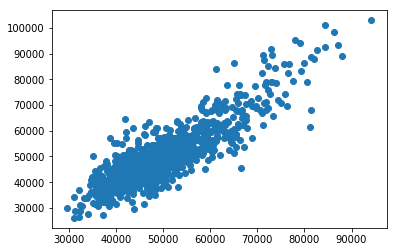

In [205]:
predictions = model.predict(X)
plt.scatter(predictions,y)

### Cluster Analysis based on Regression Independant Variables

In [253]:
from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=4,n_init=150)

In [254]:
X = residual_results[['ADM_RATE_ALL','RET_FT4', 'CDR3', 'UGDS_MEN']]
y = np.log(residual_results['MN_EARN_WNE_P10'])

In [255]:
X.head(2)

,ADM_RATE_ALL,RET_FT4,CDR3,UGDS_MEN
OPEID6,,,,
1002,0.5256,0.6595,0.172,0.4831
1052,0.8569,0.8288,0.062,0.4169


In [256]:
y.head(2)

OPEID6
1002    10.477288
1052    10.787255
Name: MN_EARN_WNE_P10, dtype: float64

In [257]:
# print(len(X),len(y))

In [258]:
dataset_array=X[['ADM_RATE_ALL','RET_FT4', 'CDR3', 'UGDS_MEN']].values
print(dataset_array.dtype)
print(dataset_array)

float64
[[0.5256     0.6595     0.172      0.4831    ]
 [0.8569     0.8288     0.062      0.4169    ]
 [0.8203     0.7696     0.061      0.5733    ]
 ...
 [0.78443051 0.8401     0.073      0.3373    ]
 [0.62651767 0.5682     0.057      0.4669    ]
 [0.6948     0.8262     0.093      0.4502    ]]


In [283]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(dataset_array)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [284]:
predicted_clusters = kmeans.predict(dataset_array)

In [285]:
# predicted_clusters

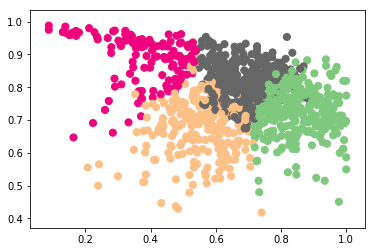

In [286]:
# Plot the predicted clusters to see if the model predicted the correct clusters
# This is visual validation that the model was trained correctly.
plt.scatter(dataset_array[:, 0], dataset_array[:, 1], c=predicted_clusters, s=50, cmap='Accent')

In [287]:
centers = kmeans.cluster_centers_
labels = kmeans.labels_

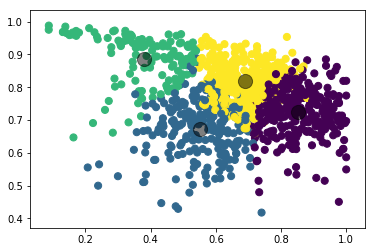

In [288]:
plt.scatter(dataset_array[:, 0], dataset_array[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.show()